In [1]:
import numpy as np

a, b, n = 0, 1, 20

mu = 0
sigma = 0.01

f = np.vectorize(lambda x: x**2)
rands = np.random.normal(mu, sigma, size=n)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

train_inp  = np.linspace(a, b, n)
train_outp = f(train_inp)

test_inp  = train_inp+(b-a)/n/2

Using TensorFlow backend.


Epoch 1/30
20/20 [==============================] - 0s - loss: 0.3518 - mean_squared_error: 0.3518     
Epoch 2/30
20/20 [==============================] - 0s - loss: 0.2376 - mean_squared_error: 0.2376     
Epoch 3/30
20/20 [==============================] - 0s - loss: 0.1709 - mean_squared_error: 0.1709     
Epoch 4/30
20/20 [==============================] - 0s - loss: 0.1329 - mean_squared_error: 0.1329     
Epoch 5/30
20/20 [==============================] - 0s - loss: 0.1015 - mean_squared_error: 0.1015     
Epoch 6/30
20/20 [==============================] - 0s - loss: 0.0851 - mean_squared_error: 0.0851     
Epoch 7/30
20/20 [==============================] - 0s - loss: 0.0740 - mean_squared_error: 0.0740     
Epoch 8/30
20/20 [==============================] - 0s - loss: 0.0669 - mean_squared_error: 0.0669     
Epoch 9/30
20/20 [==============================] - 0s - loss: 0.0633 - mean_squared_error: 0.0633     
Epoch 10/30
20/20 [==============================] - 0s - loss: 

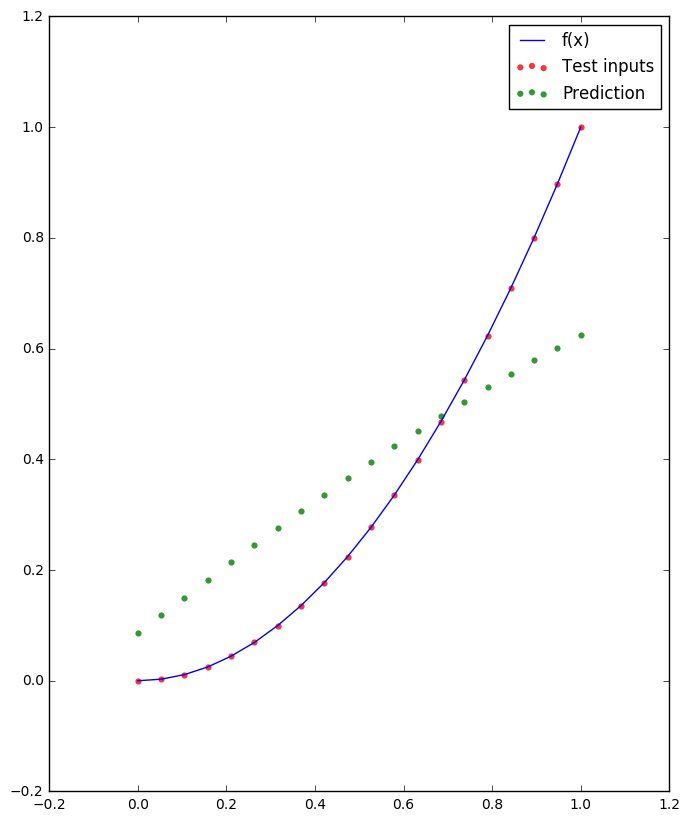

In [3]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.add(Dense(20, input_dim=1, activation='tanh'))
model.add(Dense(1, input_dim=20, activation='linear'))
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['mse'])

rand_ind = np.random.permutation(len(train_inp))
model.fit(train_inp[rand_ind], train_outp[rand_ind], nb_epoch=30, batch_size=10)

predictions = model.predict(test_inp)

plt.figure(figsize=(8,10), dpi=10)

plt.plot(test_inp, f(test_inp), c='b', label='f(x)')
plt.scatter(train_inp, train_outp, c='r', alpha=0.8, linewidths=0, label='Test inputs')
plt.scatter(test_inp, predictions, c='g', alpha=0.8, linewidths=0, label='Prediction')
plt.legend()
plt.show()